In [32]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
import random
import cv2

In [45]:
##Cargar imagen 
I = cv2.imread('im25.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
nf,nc,nch=I.shape
I=I.astype(float)

In [46]:
K=5
m=np.zeros((K,3))
for k in range(K):
    m[k,:]=I[random.randint(0, nf)][random.randint(0, nc)][:]
print(m)

[[ 54.  92. 103.]
 [ 57. 113. 130.]
 [ 89. 125. 139.]
 [ 70. 110. 118.]
 [195. 163. 124.]]


In [49]:
distancia=np.zeros((nf,nc,K))
suma=np.zeros((K,3))
cuentas=np.zeros((K,))
for iter in range(10):
    suma=suma*0
    cuentas=cuentas*0
    for i in range(nf):
        for j in range(nc):
            for k in range(K):
                distancia[i,j,k]=np.sqrt((m[k,0]-I[i,j,0])**2 \
                                     +(m[k,1]-I[i,j,1])**2 \
                                    +(m[k,2]-I[i,j,2])**2)
            ind=np.argmin(distancia[i,j,:],axis=0)
            suma[ind,0]=suma[ind,0]+I[i,j,0]
            suma[ind,1]=suma[ind,1]+I[i,j,1]
            suma[ind,2]=suma[ind,2]+I[i,j,2]
            cuentas[ind]=cuentas[ind]+1
    for k in range(K):
        m[k,:]=suma[k,:]/cuentas[k]


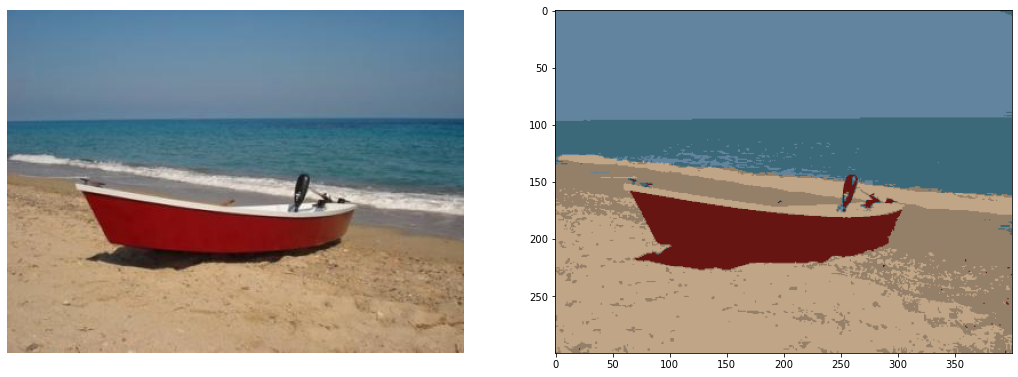

In [50]:
I_seg=I*1
for i in range(nf):
    for j in range(nc):
        for k in range(K):
            distancia[i,j,k]=np.sqrt((m[k,0]-I[i,j,0])**2 \
                                     +(m[k,1]-I[i,j,1])**2 \
                                    +(m[k,2]-I[i,j,2])**2)
        ind=np.argmin(distancia[i,j,:],axis=0)
        I_seg[i,j,:]=m[ind,:]

fig1=plt.figure(figsize = (18,7))
a = fig1.add_subplot(1, 2, 1)
plt.imshow(I.astype(int), cmap='gray',vmin=0,vmax=255)
plt.axis('off');

B = fig1.add_subplot(1, 2, 2)
plt.imshow(I_seg.astype(int))
plt.show()